In [1]:
# Dependencies
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API keys
consumer_key = '4I6nCZkeL6D21EyzskNdTYEM9'
consumer_secret = 'sVJcoXUUHrgBycm2mtmbQOiI9sb8JdwsJMY3EWOdyEnGwkYkzP'
access_token = '164025919-40mA3xjoV6NkLHPQQRry8ebOMEBGMbzkq2akg06P'
access_token_secret = 'TiKl6ZUXHf4THbXi2vAqKOWPlcQQaxfmR2teh8MWf4dyH'

# Twitter credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Create columns for dataframe
sentiments = {'Tweet Number': '',
              'News Organization': '',
              'Tweet': '',
              'Compound Score': '',
              'Positive Score': '',
              'Negative Score': '',
              'Neutral Score': ''}

In [4]:
# Create list of news accounts
target_terms = ['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes']

In [6]:
# Variable to hold list of the compound sentiment
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_number = []
text = []
news_source = []

# Loop through all target users
for target in target_terms:
        
    # Run search around each tweet
    screen_name = target
    public_tweets = api.user_timeline(target,
                                      count=100)
    
    # Index to see how many tweets for each news source
    index = 0
        
    # Loop through all tweets
    for tweet in public_tweets:
        
        news_organization = target
            
        # Run vader analysis on each tweet
        scores = analyzer.polarity_scores(tweet['text'])
        compound = scores['compound']
        pos = scores['pos']
        neu = scores['neu']
        neg = scores['neg']
        
        # Add value to list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        text.append(tweet['text'])
        tweet_number.append(index)
        news_source.append(news_organization)
        
        index = index + 1

In [7]:
# Add values from list to dataframe
sentiments['Tweet Number'] = tweet_number
sentiments['News Organization'] = news_source
sentiments['Tweet'] = text
sentiments['Compound Score'] = compound_list
sentiments['Positive Score'] = positive_list
sentiments['Negative Score'] = negative_list
sentiments['Neutral Score'] = neutral_list

sentiments_df = pd.DataFrame(sentiments)
sentiments_df.to_csv('sentimentsnewsmedia.csv')
sentiments_df

,Tweet Number,News Organization,Tweet,Compound Score,Positive Score,Negative Score,Neutral Score
0,0,@BBC,✨ It's almost time for the first episode of #H...,0.3182,0.119,0.000,0.881
1,1,@BBC,Tonight #SevenWorldsOnePlanet explores Asia - ...,0.0000,0.000,0.000,1.000
2,2,@BBC,"RT @BBCSounds: ""Money just shouldn't be in the...",0.7096,0.237,0.000,0.763
3,3,@BBC,"RT @BBCRadio2: ""One of the biggest British ban...",0.0000,0.000,0.000,1.000
4,4,@BBC,Do we think differently in different languages...,0.0000,0.000,0.000,1.000
5,5,@BBC,Would love to see Kerry on #TheApprentice. 💼💰\...,0.6369,0.244,0.000,0.756
6,6,@BBC,How pianos became part of the furniture at UK ...,0.0000,0.000,0.000,1.000
7,7,@BBC,SO many people came together to be part of Sur...,0.0000,0.000,0.000,1.000
8,8,@BBC,Coming up on @bbc5live today: #PalacevLeiceste...,0.0000,0.000,0.000,1.000
9,9,@BBC,Is the screen you're looking at right now maki...,0.0000,0.000,0.000,1.000


In [8]:
# Get overall/average of sentiment compount values for each agency
avg_sentiments_df = sentiments_df.groupby('News Organization').mean()
avg_sentiments_df.to_csv('avgsentiments.csv')
avg_sentiments_df

,Tweet Number,Compound Score,Positive Score,Negative Score,Neutral Score
News Organization,,,,,
@BBC,49.5,0.147353,0.10029,0.04253,0.85718
@CBS,49.5,0.233592,0.14594,0.02430,0.82977
@CNN,49.5,-0.031690,0.07315,0.08337,0.84346
@FoxNews,49.5,-0.051324,0.06074,0.09410,0.84514
@nytimes,49.5,0.019225,0.07690,0.07496,0.84812


In [9]:
# Get timestamp
present_date = time.strftime("%m/%d/%Y")
present_date

'11/03/2019'

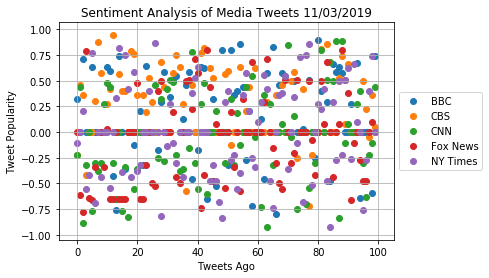

In [10]:
# Create dataframe for each news source and plot
bbc_compound_df = sentiments_df.loc[sentiments_df['News Organization'] == '@BBC']
plt.scatter(bbc_compound_df['Tweet Number'], bbc_compound_df['Compound Score'], label='BBC')

cbs_compound_df = sentiments_df.loc[sentiments_df['News Organization'] == '@CBS']
plt.scatter(cbs_compound_df['Tweet Number'], cbs_compound_df['Compound Score'], label='CBS')

cnn_compound_df = sentiments_df.loc[sentiments_df['News Organization'] == '@CNN']
plt.scatter(cnn_compound_df['Tweet Number'], cnn_compound_df['Compound Score'], label='CNN')

foxnews_compound_df = sentiments_df.loc[sentiments_df['News Organization'] == '@FoxNews']
plt.scatter(foxnews_compound_df['Tweet Number'], foxnews_compound_df['Compound Score'], label='Fox News')

nytimes_compound_df = sentiments_df.loc[sentiments_df['News Organization'] == '@nytimes']
plt.scatter(nytimes_compound_df['Tweet Number'], nytimes_compound_df['Compound Score'], label='NY Times')

plt.title(f'Sentiment Analysis of Media Tweets {present_date}')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Popularity')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.savefig('CompoundNewsMedia.png')
plt.show()

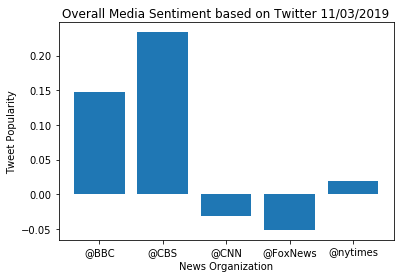

In [11]:
# Plot average sentiment compound of each source
# Reset index
updated_sentiments_df = avg_sentiments_df.reset_index()

plt.bar(updated_sentiments_df['News Organization'], updated_sentiments_df['Compound Score'])
plt.title(f'Overall Media Sentiment based on Twitter {present_date}')
plt.xlabel('News Organization')
plt.ylabel('Tweet Popularity')
plt.savefig('AvgCompoundNewsMedia.png')
plt.show()

In [ ]:
ANALYSIS

1. CNN has the most negative sentiments in their tweets, based on the bar graph
2. CBS has the most positive sentiments in their tweets and also had the most popular tweets. 
3. NYTimes is cloest to fair and netural